**NAMA  : JAREN**

**NIM   : 09011282126095**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Klasifikasi penyakit diabetes menggunakan model Support Vector Machine atau SVM

Pada project ini saya memilih tema klasifikasi penyakit diabetes. pada klasifikasi ini menggunakan data pasien diabetes dimana data pasien tersebut berisi beberapa variabel indikator kesehatan seperti glukosa, Blood Preasure dll, dan akan diklasifikasikan menjadi dua yaitu pasien yang menderita diabetes atau tidak. untuk metode pemodelan nya menggunakan SVM atau Support Vector Machine, Model SVM ini biasanya digunakan peneliti untuk melakukan klasifikasi. model svm memisahkan 2 kelompok data dengan mencari garis atau hiperlane terbaik diantar keduanya. Dengan adanya project ini dapat menentukan apakah pasien menderita diabetes atau tidak berdasarkan variabel data nya seperti Glukosa, tekanan darah dan lainnya. Saya memilih dataset dari kaggle yaitu Dataset Pima Indians Diabetes. Dataset ini merupakan sebuah dataset penyakit diabetes mellitus (DM) berdasarkan pemeriksaan kesehatan. Dataset ini terdiri dari 768 record yang terdiri dari 8 atribut.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#**Import Data**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/MachineLearning /diabetes.csv')

In [5]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Dataset ini berasal dari Institut Nasional Diabetes dan Penyakit Pencernaan dan Ginjal. Tujuan dari kumpulan data adalah untuk memprediksi secara diagnostik apakah pasien menderita diabetes atau tidak, berdasarkan pengukuran diagnostik tertentu yang termasuk dalam kumpulan data.  Secara khusus, semua pasien di dalam data ini adalah wanita berusia minimal 21 tahun dari India Pima. Kumpulan data terdiri dari beberapa variabel prediktor medis dan satu variabel target, Outcome. Variabel prediktor termasuk jumlah kehamilan yang dimiliki pasien, BMI mereka, tingkat insulin, usia, dan sebagainya.

terdapat beberapa atribut, dimana salah satu diantaranya merupakan label yaitu outcome. Dalam konteks Support Vector Machine (SVM), istilah "label" biasanya merujuk pada kelas atau kategori yang akan diprediksi oleh model.Pada klasifikasi projek ini terdapat 2 kelas yang akan diprediksi yaitu terdiagnosis diabetes atau tidak terdiagnosis diabetes. Label 1 berarti terdiagnosis diabetes dan label 0 tidak terdiagnosis diabetes.

##**Analisis Eksploratif Dataset**

In [6]:
print("Data Shape : ", df.shape)

Data Shape :  (768, 9)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


dapat dilihat dari info dataset bahwa tipe data pada setiap atribut semuanya
termasuk dalam tipe data integer, 6 atribut dengan tipe data int64 dan 2 atribut dengan float64.

In [8]:

df[['Pregnancies', 'BloodPressure', 'Age', 'BMI']].describe()

,Pregnancies,BloodPressure,Age,BMI
count,768.000000,768.000000,768.000000,768.000000
mean,3.845052,69.105469,33.240885,31.992578
std,3.369578,19.355807,11.760232,7.884160
min,0.000000,0.000000,21.000000,0.000000
25%,1.000000,62.000000,24.000000,27.300000
50%,3.000000,72.000000,29.000000,32.000000
75%,6.000000,80.000000,41.000000,36.600000
max,17.000000,122.000000,81.000000,67.100000


beberapa atribut yang perlu diperhatikan, pada baris paling bawah merupakan nilai max dari setiap atribut, dimana pada atribut pregnancies nilai max nya adalah 17, BloodPressure 122, Age 81 dan BMI 67. baris paling atas sendiri merupakan jumlah baris data dimana setiap atribut memiliki jumlah baris data yang sama yaitu 768.

In [9]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

terdapat 500 baris data 0 yang tidak terdiagnosis diabetes, dan 268 baris data 1 terdiagnosis diabetes.

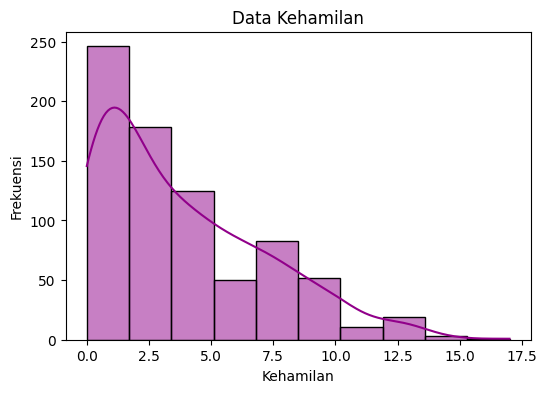

In [10]:
plt.figure(figsize=(6, 4) )
sns.histplot(data=df, x='Pregnancies', bins=10, kde=True, color='#91008a')

plt.title("Data Kehamilan")
plt.xlabel("Kehamilan")
plt.ylabel("Frekuensi")
plt.show()

grafik diatas merupakan gambaran dari visualisasi terhadap data Pregnancies, dapat dilihat bahwa
nilai kehamilan 17 memiliki frekuensi kemunculan data paling sedikit yaitu kurang dari 5 dan
nilai kehamilan 0-2.5 memiliki frekuensi kemunculan data paling tinggi yaitu 250. berdasarkan grafik tersebut, dapat disimpulkan pada atribute Kehamilan lebih cenderung mendominasi ke nilai 0-2.5.

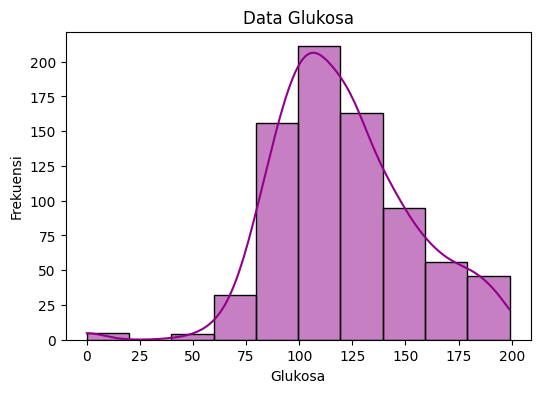

In [11]:
plt.figure(figsize=(6, 4) )
sns.histplot(data=df, x='Glucose', bins=10, kde=True, color='#91008a')

plt.title("Data Glukosa")
plt.xlabel("Glukosa")
plt.ylabel("Frekuensi")
plt.show()

grafik diatas merupakan gambaran dari visualisasi terhadap Data glukosa , dapat dilihat bahwa
orang dengan glukosa 100-125 memiliki frekuensi kemunculan data paling banyak yaitu lebih dari 200 dan
nilai Glukosa 20-35 memiliki frekuensi kemunculan data paling kecil yaitu kurang dari 5. berdasarkan grafik tersebut, dapat disimpulkan pada atribute Glukosa lebih cenderung mendominasi ke nilai 100-125.

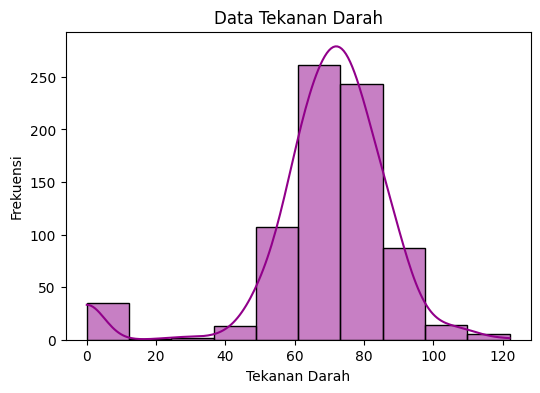

In [12]:
plt.figure(figsize=(6, 4) )
sns.histplot(data=df, x='BloodPressure', bins=10, kde=True, color='#91008a')

plt.title("Data Tekanan Darah")
plt.xlabel("Tekanan Darah")
plt.ylabel("Frekuensi")
plt.show()

grafik diatas merupakan gambaran dari visualisasi terhadap data BloodPressures, dapat dilihat bahwa
tekanan darah 62-85 memiliki frekuensi kemunculan data paling banyak yaitu kurang sekitar 250 dan
tekanan darah 150-22 memiliki frekuensi kemunculan data paling sedikit yaitu kurang dari 5.

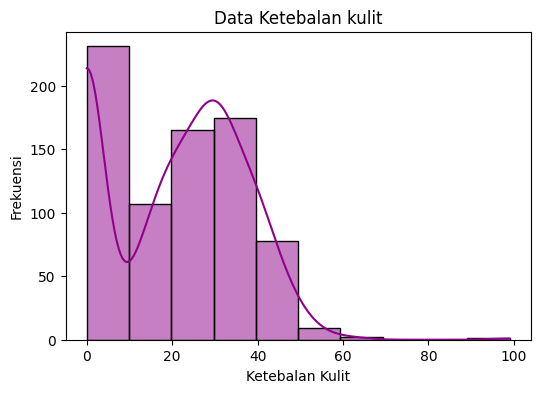

In [13]:
plt.figure(figsize=(6, 4) )
sns.histplot(data=df, x='SkinThickness', bins=10, kde=True, color='#91008a')

plt.title("Data Ketebalan kulit")
plt.xlabel("Ketebalan Kulit")
plt.ylabel("Frekuensi")
plt.show()

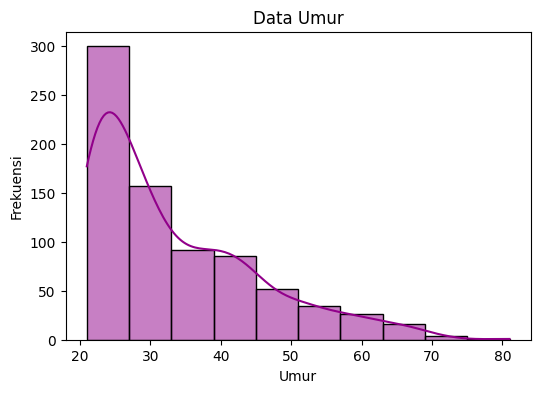

In [14]:
plt.figure(figsize=(6, 4) )
sns.histplot(data=df, x='Age', bins=10, kde=True, color='#91008a')

plt.title("Data Umur")
plt.xlabel("Umur")
plt.ylabel("Frekuensi")
plt.show()

grafik diatas merupakan gambaran dari visualisasi terhadap data umur, dapat dilihat bahwa
umur 20 sampai 30 tahun  memiliki frekuensi kemunculan data paling tinggi yaitu hampir 300 dan
umur 80 tahun memiliki frekuensi kemunculan data paling rendah yaitu. berdasarkan grafik tersebut, dapat disimpulkan
pada atribute umur lebih cenderung mendominasi ke umur lebih muda di range 20-30an.

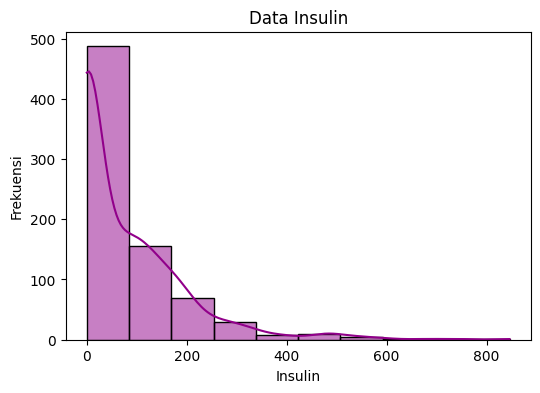

In [15]:
plt.figure(figsize=(6, 4) )
sns.histplot(data=df, x='Insulin', bins=10, kde=True, color='#91008a')

plt.title("Data Insulin")
plt.xlabel("Insulin")
plt.ylabel("Frekuensi")
plt.show()

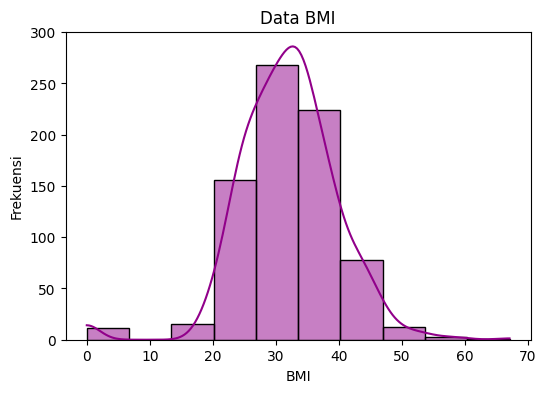

In [16]:
plt.figure(figsize=(6, 4) )
sns.histplot(data=df, x='BMI', bins=10, kde=True, color='#91008a')

plt.title("Data BMI")
plt.xlabel("BMI")
plt.ylabel("Frekuensi")
plt.show()

berdasarkan grafik tersebut, atribut BMI 28-33 memiliki frekuensi kemunculan paling tinggi yaitu lebih dari 250, dan 8-10 memiliki frekuensi kemunculan paling rendah yaitu kurang dari 3

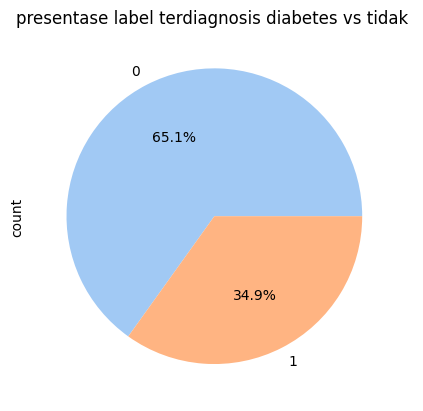

In [17]:
sns.set_palette('pastel')
df['Outcome'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('presentase label terdiagnosis diabetes vs tidak ')
plt.show()

dapat dilihat pada gambar diatas dimana label 0 lebih mendominasi 65,1%, sisa nya 34,9% label 1.
Dapat disimpulkan bahwa pada data diabetes ini orang yang menderita diabetes presentase nya lebih sedikit
dibanding yang tidak menderita diabetes dan perbedaan nya tidak terlalu jauh masih dalam batas wajar.

In [18]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Data diatas merupakan korelasi dari nilai masing masing atribut. dapat dilihat korelasi di x dan y untuk atribut kehamilan
bernilai 1 karena atribut nya sama. maka dari itu semakin nilai korelasi tersebut mendekati 1 atau mencapai angka 1 artinya korelasi nya baik.
sebaliknya jika nilai korelasi tersebut minus atau mendekati minus 1 artinya nilai korelasi antar atributnya tidak memiliki korelasi.
dapat dilihat pada data tersebut terdapat nilai minus antara ketebalan kulit dan kehamilan yang artinya nilai korelasi nya tidak bagus.

<Axes: >

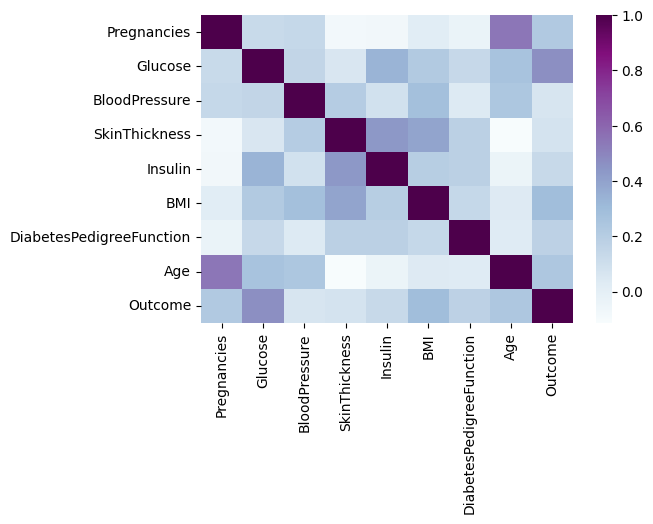

In [19]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), cmap='BuPu')

dapat dilihat jika bernilai 1 maka korelasi nya berwarna gelap, dan semakin menjauhi 1 maka semakin terang.

#**Identifikasi Masalah Dataset dan Preprocessing Data**

<h3> Missing Value

In [20]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Berdasarkan data tersebut angka 0 mewakili bahwa tidak terdapat missing value

<h3> Mencari Duplicate Data

In [21]:
df.duplicated().sum()

0

Tidak ada duplikasi terhadap data

Mungkin tidak banyak Identifikasi masalah dari dataset yang saya gunakan ini, karena Data diabetes sering kali tidak memerlukan banyak preprocessing untuk klasifikasi menggunakan Support Vector Machine (SVM) karena alasan-alasan seperti berikut ini:

1. Struktur Data yang Jelas: Dataset diabetes umumnya telah diolah dan disiapkan sebelumnya, dan strukturnya sudah jelas. Biasanya, dataset ini telah melalui proses pembersihan dan penghapusan nilai yang hilang sebelumnya. Oleh karena itu, tidak banyak preprocessing yang diperlukan.

2. Fitur Numerik: Fitur-fitur dalam dataset diabetes sebagian besar berupa fitur numerik seperti kadar glukosa darah, tekanan darah, dan indeks massa tubuh (BMI). SVM secara alami cocok dengan fitur-fitur numerik ini.

3. SVM Toleran terhadap Outlier: SVM cenderung toleran terhadap outlier, yang berarti bahwa outlier dalam data diabetes mungkin tidak memengaruhi performa model secara signifikan. Oleh karena itu, tidak perlu banyak preprocessing untuk menangani outlier.

4. Skala Fitur yang Seragam: Dalam dataset diabetes, skala fitur-fitur biasanya sudah seragam atau tidak jauh berbeda satu sama lain. SVM cenderung tidak terlalu dipengaruhi oleh perbedaan skala fitur, sehingga tidak perlu dilakukan normalisasi atau penskalaan fitur.

Dengan beberapa alasan tersebut mungkin cukup disini untuk identifikasi dan penyelesaian masalah dataset karena tidak terlalu diperlukan.

#**Pemilihan Model**

<h2> Dalam Klasifikasi diabetes disini saya menggunakan model Support Vector Machine (SVM)

Support Vector Machine (SVM) merupakan salah satu metode dalam supervised learning yang biasanya digunakan untuk klasifikasi dan regresi. SVM bekerja untuk mencari hyperplane atau fungsi pemisah (decision boundary) terbaik untuk memisahkan dua buah kelas atau lebih pada ruang input. Hiperplane dapat berupa line atau garis pada dua dimensi dan dapat berupa flat plane pada multiple plane.  
Kelebihan SVM:
1. Efektif dalam Dimensi Tinggi: SVM efektif dalam ruang fitur berdimensi tinggi, bahkan ketika jumlah fitur jauh melebihi jumlah sampel data.
2. Tahan terhadap Overfitting: Dengan margin maksimum, SVM cenderung tahan terhadap overfitting, terutama dalam kasus data yang linier dipisahkan.
3. Versatil: SVM dapat digunakan untuk masalah klasifikasi dan regresi, dan dapat menangani kasus-kasus yang tidak linier dengan menggunakan kernel trick.
Kekurangan SVM
1. Sensitif terhadap Pemilihan Kernel: Performa SVM sangat tergantung pada pemilihan kernel yang tepat. Pemilihan kernel yang buruk dapat menghasilkan model yang buruk.
2. Kompleksitas Komputasi: Pelatihan SVM bisa memakan waktu dan membutuhkan sumber daya komputasi yang signifikan, terutama dalam kasus data yang besar.
3. Keterbatasan dalam Kasus Data Besar: Ketika jumlah data sangat besar, SVM mungkin tidak efisien karena kompleksitas komputasinya.


#**Arsitektur Model Support Vector Machine ( SVM )**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


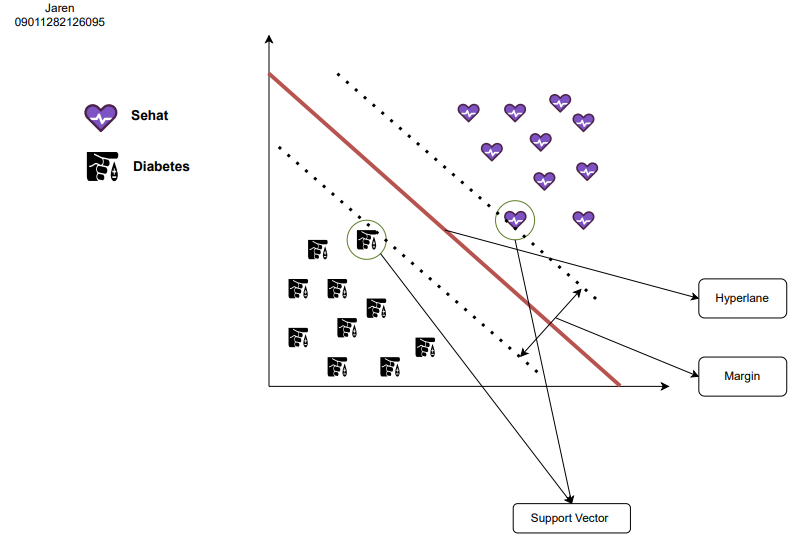

In [22]:
from google.colab import drive
drive.mount('/content/drive')

from PIL import Image

image_path = ('/content/drive/MyDrive/MachineLearning /ScreenshotModel.png')
image = Image.open('/content/drive/MyDrive/MachineLearning /ScreenshotModel.png')
image

Pada gambar diatas terdapat beberapa struktur dari arsitektur SVM

1. Hyperlane. Hyperplane adalah batas keputusan yang membedakan dua kelas dalam SVM. Titik data yang jatuh di kedua sisi hyperplane dapat dikaitkan dengan kelas yang berbeda. Dimensi hyperplane bergantung pada fitur yang ada pada dataset, yang artinya jika terdapat dua fitur, maka hyperplane akan berbentuk garis lurus. Dan jika terdapat tiga fitur, maka hyperplane akan menjadi bidang dua dimensi. pada data yang saya gunakan terdapat dua fitur dimana fitur nya ialah penderita diabetes dan non diabetes.

2. Support Vector. Support vector ialah titik data atau vektor yang paling dekat dengan hyperplane dan yang mempengaruhi posisi hyperplane. Karena vektor-vektor ini mendukung hyperplane, maka disebut support vector. Pada gambar diatas Support Vector ditandai dengan icon yang dilingkari.

3. Margin adalah jarak antara support vector dari masing-masing kelas di sekitar hyperplane. Pada gambar diatas, margin diilustrasikan dengan jarak antara 2 garis putus. Margin terbesar (max margin) dapat ditemukan dengan memaksimalkan nilai jarak antara hyperplane dan titik terdekatnya.

Keterangan : Icon berwarna hitam merupakan label 0 dimana menyatakan kelas penderita diabetes, Icon Hati berwarna ungu merupakan label 1 dimana menyatakan kelas pasien non diabetes

#**Flowchart Algoritma Pembangunan SVM**

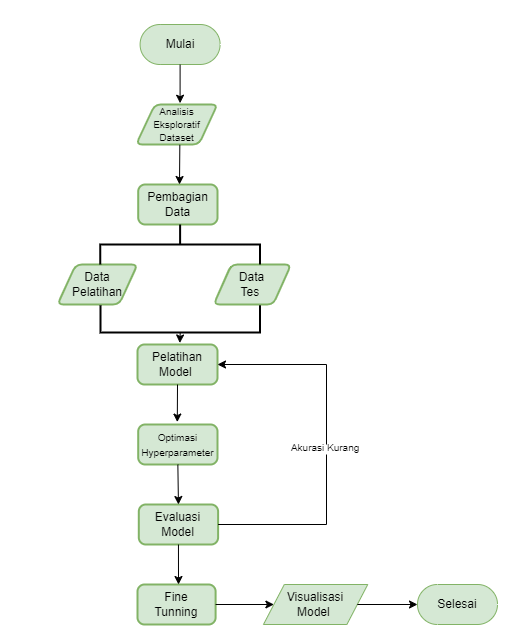

In [23]:
image = Image.open('/content/drive/MyDrive/MachineLearning /FlowchartRev.png')
image

1. Analisis Eksploratif Data (Exploratory Data Analysis atau EDA) adalah proses investigasi awal yang dilakukan pada dataset untuk memahami karakteristik, pola, dan hubungan antar variabel dalam data. Tujuan utama dari EDA adalah untuk mendapatkan wawasan yang berharga dan memahami struktur data sehingga dapat menginformasikan langkah-langkah analisis lanjutan atau pengambilan keputusan.
3. splitting data Pembagian data menjadi subset pelatihan dan pengujian (train-test split) adalah proses yang penting dalam analisis data dan pembangunan model machine learning. Tujuannya adalah untuk menghasilkan dua set data yang terpisah: satu untuk melatih model dan yang lainnya untuk menguji kinerja model.
4. Training Model merujuk pada proses di mana sebuah model machine learning belajar dari data yang telah diberikan untuk melakukan tugas tertentu.
5. Testing Model merupakan proses evaluasi kinerja model yang telah dilatih menggunakan data yang digunakan

#**Pembagian Data / Split Data**

In [24]:
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

print("X : ", X.shape)
print("y : ", y.shape)

X :  (768, 8)
y :  (768,)


Semua fitur dan atribut yang ada pada dataset disimpan dalam variabel X kecuali label "outcome" atau hasil

Label Outcome atau hasil disimpan dalam variabel y

Pembagian dataset adalah langkah penting dalam pengembangan model Supervised Learning termasuk model SVM. Pemisahan ini dilakukan untuk membagi dataset menjadi dua subset yang berbeda, seperti data pelatihan dan data pengujian. yang memungkinkan kita untuk melatih model pada satu subset dan menguji kinerjanya pada subset yang lain, sehingga dapat mengevaluasi seberapa baik model bekerja pada data baru yang belum pernah dilihat.

In [25]:
# Bagi dataset menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**X** : Merupakan Variabel yang berisi semua fitur atau atribut pada data.

**y** : Merupakan variabel yang berisi target atau label yang sesuai dengan setiap baris data di X.

**test_size=0.2** : Parameter ini menentukan ukuran data pengujian sebagai proporsi dari dataset keseluruhan. Dalam kasus ini, test_size=0.2 berarti 20% dari data akan digunakan untuk pengujian, sedangkan 80% akan digunakan untuk pelatihan.

**random_state=42** : Parameter ini adalah bilangan bulat yang menentukan pemilihan acak data yang dipisahkan. Ini memastikan bahwa hasil pemisahan dataset akan konsisten setiap kali kode dijalankan.

#**Pelatihan / Training Model**

In [26]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

**clf = SVC(kernel='linear')** digunakan untuk membuat objek model Support Vector Classifier (SVC) dengan kernel linier. SVC adalah salah satu jenis algoritma Support Vector Machine (SVM) yang digunakan untuk masalah klasifikasi. Kernel linier berarti bahwa model SVM akan menggunakan fungsi kernel linier untuk memisahkan kelas-kelas yang berbeda.

Setelah model SVC dibuat, **clf.fit(X_train, y_train)** digunakan untuk melatih (menggunakan data pelatihan) model tersebut. Fungsi fit() digunakan untuk melatih model dengan menggunakan fitur-fitur yang disimpan dalam X_train dan label-label yang disimpan dalam y_train. Hal ini akan mengoptimalkan parameter-model sehingga sesuai dengan pola dalam data pelatihan atau data train.

#**Evaluasi Model**

In [27]:
y_pred = clf.predict(X_test)
CLF_acc = accuracy_score(y_pred, y_test)

Setelah training model, **y_pred = clf.predict(X_test)** digunakan untuk  melakukan prediksi pada data pengujian. Fungsi predict() digunakan untuk memprediksi label-label yang sesuai dengan fitur-fitur dalam X_test berdasarkan model yang telah dilatih. Hasil prediksi disimpan dalam variabel y_pred.

metrik relevan yang digunakan untuk mengukur/Evaluasi kinerja model ini adalah akurasi (accuracy) yang ditunjukkan pada kode

**CLF_acc = accuracy_score(y_pred, y_test)**

In [28]:
print (classification_report(y_test, y_pred))
print("akurasi SVM nya adalah : {:.2f}%".format(CLF_acc*100) )

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

akurasi SVM nya adalah : 75.32%


Akurasi keseluruhan model adalah 0.75, yang berarti 75,32% dari semua prediksi yang dilakukan oleh model adalah benar.

#**Optimasi Hyperparameter**

Jika pada training sebelumnya menggunakan parameter kernel linear, disini saya mencoba menggunakan parameter lain yaitu C.

In [29]:
clf2 = SVC(C=1.0)

Parameter C dalam model Support Vector Classifier (SVC) mengontrol tingkat penalti terhadap kesalahan klasifikasi. Ketika nilai C ditingkatkan, model cenderung berusaha untuk mengklasifikasikan setiap titik data dengan benar, bahkan jika itu berarti membuat batas keputusan yang kompleks. Sebaliknya, nilai C yang lebih rendah memberikan toleransi yang lebih besar terhadap kesalahan klasifikasi, menghasilkan batas keputusan yang lebih sederhana.

In [30]:
# Melatih model menggunakan data X_train dan label y_train
clf2.fit(X_train, y_train)

SVC()

In [31]:
y_pred = clf2.predict(X_test)
CLF2_acc = accuracy_score(y_pred, y_test)

In [32]:
print (classification_report(y_test, y_pred))
print("akurasi SVM nya adalah : {:.2f}%".format(CLF2_acc*100) )

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.72      0.56      0.63        55

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154

akurasi SVM nya adalah : 76.62%


Setelah dilakukan Optimasi Hyperparameter, akurasi yang tadinya 75,32 % meningkat menjadi 76,62 %. Dengan menggunakan parameter C yang nilainya 1.0. Nilai C tersebut juga dapat diubah sesuai dengan kebutuhan.

#**Fine Tuning Evaluasi**

#Selain menggunakan SVM, Klasifikasi penyakit diabetes juga dapat dilakukan menggunakan model random forest. disini saya memilih random forest untuk perbandingan dengan SVM.

#Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
# Definisikan model Random Forest
clf3 = RandomForestClassifier(n_estimators=100)

#Parameter yang digunakan adalah n_estimator.
n_estimators adalah salah satu parameter utama dalam algoritma Random Forest yang menentukan jumlah pohon keputusan yang akan dibuat dalam ensemble. Dalam Random Forest, model terdiri dari kumpulan pohon keputusan yang bekerja bersama-sama untuk membuat prediksi. Setiap pohon dipelajari pada sampel data yang diambil secara acak dari dataset yang tersedia.

In [35]:
# Latih model pada data training
clf3.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
y_pred = clf3.predict(X_test)
CLF3_acc = accuracy_score(y_pred, y_test)

In [41]:
print (classification_report(y_test, y_pred))
print("akurasi Random Forest nya adalah : {:.2f}%".format(CLF3_acc*100) )

              precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154

akurasi Random Forest nya adalah : 74.03%


Akurasi yang dihasilkan SVM lebih tinggi dibandingkan randomforest

#**Terjemahan Model**

Berikut adalah terjemahan dari hasil model SVM dan Random Forest berdasarkan akurasi yang didapat pada saat evaluasi model:

Akurasi Model SVM:
Model Support Vector Machine (SVM) memiliki akurasi sebesar 76%.
Artinya, model ini dapat membuat prediksi yang tepat sebanyak 76% dari total data yang diujikan.
Akurasi Model Random Forest:
Model Random Forest memiliki akurasi sebesar 74%.
Artinya, model ini dapat membuat prediksi yang tepat sebanyak 74% dari total data yang diujikan.
Secara keseluruhan, model SVM memiliki akurasi yang sedikit lebih tinggi dibandingkan dengan model Random Forest dalam melakukan klasifikasi data penyakit diabetes ini.

Dengan menggunakan informasi ini, kita dapat mempertimbangkan model mana yang lebih sesuai dengan kebutuhan berdasarkan akurasi yang dicapai. juga dapat mengeksplorasi parameter lain seperti waktu pelatihan dan kompleksitas model untuk menentukan model yang paling sesuai untuk proyek ini.

#**Visualisasi  Hasil Akurasi Model**

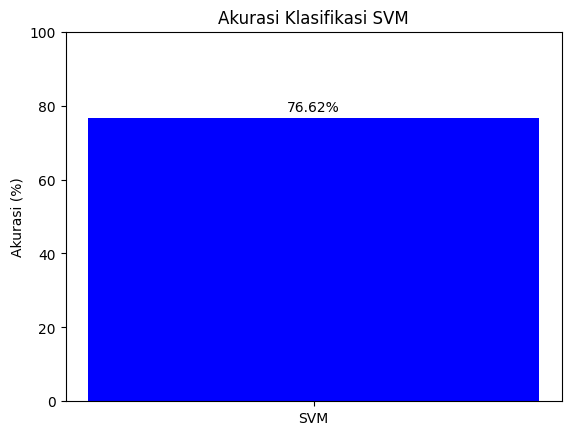

In [44]:
accuracy = CLF2_acc * 100
plt.title("Akurasi Klasifikasi SVM")
plt.bar("SVM", accuracy, color='blue')
plt.ylabel("Akurasi (%)")
plt.ylim(0, 100)
plt.text(0, accuracy + 1, f"{accuracy:.2f}%", ha='center', va='bottom')
plt.show()

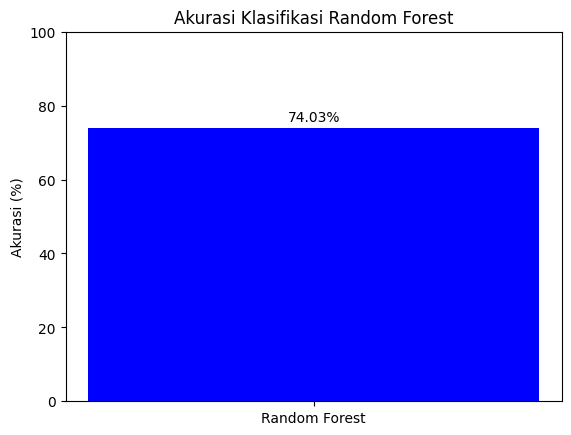

In [45]:
accuracy = CLF3_acc * 100
plt.title("Akurasi Klasifikasi Random Forest")
plt.bar("Random Forest", accuracy, color='blue')
plt.ylabel("Akurasi (%)")
plt.ylim(0, 100)
plt.text(0, accuracy + 1, f"{accuracy:.2f}%", ha='center', va='bottom')
plt.show()
